<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Mental_Health_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L'objectif est de créer un modèle qui permet de prédire si une personne est depressif (1) ou non-depressif (0).**

La variable cible est "Depression"

Explication des colonnes :

1.   **id :** Un identifiant unique attribué à chaque individu.
2.   **Name :** Nom de l'individu
3.   **Gender :** Genre de l'individu
4.   **Age :** Âge de l'individu.
5.   **City :** Ville où réside l'individu
6.   **Working Professional or Student :** Indique si l'individu est un étudiant ou un professionnel en activité.
7.   **Profession :** Profession actuelle de l'individu
8.   **Academic Pressure :** Une mesure de la pression académique ressentie par l'individu
9.   **Work Pressure :** Une mesure de la pression liée au travail, souvent sur une échelle (1 étant faible, 5 étant élevé).
10.   **CGPA :** Moyenne pondérée cumulative, une mesure des performances académiques
11.   **Study Satisfaction :** Niveau de satisfaction par rapport aux études (échelle numérique, où des valeurs plus élevées peuvent indiquer une satisfaction supérieure).
12.   **Job Satisfaction :** Niveau de satisfaction par rapport au travail
13.   **Sleep Duration :** Durée moyenne de sommeil de l'individu par jour
14.   **Dietary Habits :** Habitudes alimentaires de l'individu
15.   **Degree :** Niveau de diplôme ou formation académique obtenue par l'individu
16.   **Have you ever had suicidal thoughts? :** Réponse binaire indiquant si l'individu a déjà eu des pensées suicidaires
17.   **Work/Study Hours :** Nombre moyen d'heures travaillées ou consacrées aux études par jour.
18.   **Financial Stress :** Niveau de stress financier ressenti par l'individu
19.   **Family History of Mental Illness :** Indique si l'individu a des antécédents familiaux de maladies mentales ("Yes" ou "No")
20.   **Depression :** Une colonne binaire indiquant si l'individu est actuellement dépressif ou non (0 pour non, 1 pour oui


Dernier jour c'est le 28 février pour rendre le projet.

Chercher les doublons, les valeurs nulles, il enleve le id, le nom de la paersonne parceque ça n'affecte pas la depression,

valeur dominante pari les variables categorielles

equilibre entre sexe ete feminin. Il faut que les nombres se rapprochent dans les variables categorielles

Justifier pourquoi  tu as fait le graphisme, et commenter le graphisme.

Base de données non-equilibré.

Violinplot  pour voir chaque colonne qui explique la depression ou pas.


Le sexe n'affecte pas vraiment la variable cible d'apres le graphe du prof

Toujours essayer d'analyser varaible par variable

Diagramme de Sankey

squarify plot

On ne laisse pas 18% et 82%. Si on laisse ça le dataset va apprendre plus.

c'est la precision et le recall qu'il faut travailler


In [11]:
import pandas as pd
import numpy as np
data = pd.read_excel('train.xlsx')
data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
summary = data.describe()
summary

,id,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
print(data['Working Professional or Student'].unique())

['Working Professional' 'Student']


## **Analyse des valeurs manquantes**

In [ ]:
import numpy as np  # Réimportation de numpy

# Analyse des valeurs manquantes
missing_values = data.isnull().sum() / len(data) * 100
missing_summary = pd.DataFrame({'Column': data.columns, 'MissingPercentage': missing_values}).sort_values(by='MissingPercentage', ascending=False)

# Statistiques descriptives pour identifier les valeurs aberrantes (pour les colonnes numériques)
numerical_columns = data.select_dtypes(include=[np.number]).columns
numerical_summary = data[numerical_columns].describe().transpose()

# Afficher les résultats des valeurs manquantes et des statistiques descriptives
missing_summary
#numerical_summary

,Column,MissingPercentage
Study Satisfaction,Study Satisfaction,80.172708
Academic Pressure,Academic Pressure,80.172708
CGPA,CGPA,80.171997
Profession,Profession,26.034115
Work Pressure,Work Pressure,19.842217
Job Satisfaction,Job Satisfaction,19.836532
Dietary Habits,Dietary Habits,0.002843
Financial Stress,Financial Stress,0.002843
Degree,Degree,0.001421
Family History of Mental Illness,Family History of Mental Illness,0.000000


Certaines colonnes ont un pourcentage significatif de valeurs manquantes, par exemple, "Academic Pressure", "CGPA" et "Study Satisfaction".


Les colonnes "Academic Pressure", "CGPA" et "Study Satisfaction" ont énormement des valeurs manquantes parce que ce sont des colonnes concernant uniquement les **étudiants**.


D'autre part la colonne "Profession" a 26,03% de valeurs manquantes parce que les étudiants n'ont pas de profession et certaines personnes refusent de donner leur profession.

Les colonnes "Work Pressure" et "Job Satisfaction" ont 19,9% de valeurs ce qui représente les 19,9% ou 20% d'étudiants dans la population globale étudiée.

Ainsi on pourrait separer le jeu de données en deux groupes : un groupe d'étudiants et un groupe de travailleurs. Dans le groupe de **travailleurs** , on n'aurait pas les colonnes : "Academic Pressure", "CGPA" et "Study Satisfaction". Et dans le groupe **d'étudiants**, on n'aurait pas les colonnes
"Profession", "Work Pressure" et "Job Satisfaction"

**On scinde le dataframe**

**Division du jeu de données en 2: un jeu de données des travaileurs et un jeu de données des etudiants.**

In [13]:
# Filtrer les étudiants
data_student = data.loc[data['Working Professional or Student'] == 'Student']

# Filtrer les professionnels
data_professional = data.loc[data['Working Professional or Student'] == 'Working Professional']

# Afficher les premières lignes de chaque DataFrame
# print("DataFrame des étudiants :")
data_student.head()

# print("\nDataFrame des professionnels :")
# print(data_professional.head())
#data_student['Job Satisfaction'].unique()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,2024-09-05 00:00:00,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,2024-03-07 00:00:00,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [14]:
data_professional.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0


**Etudiants**

Valeurs uniques et leurs nombres dans chaque colonnes ou on a le plus de valeurs manquantes

In [ ]:
print(data_student['Job Satisfaction'].value_counts(dropna=False))

Job Satisfaction
NaN    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64


In [ ]:
print(data_student['Profession'].value_counts(dropna=False))

Profession
NaN                       27867
Architect                     8
Teacher                       6
Digital Marketer              3
Student                       3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64


In [ ]:
print(data_student['Work Pressure'].value_counts(dropna=False))

Work Pressure
NaN    27898
5.0        2
2.0        1
Name: count, dtype: int64


**Suppression des colonnes avec le plus des valeurs manquantes**

In [15]:
# Création du DataFrame Travailleurs
data_professional = data_professional.drop(columns=['Working Professional or Student', 'Academic Pressure', 'Study Satisfaction', 'CGPA'])

# Création du DataFrame Étudiants
data_student = data_student.drop(columns=['Working Professional or Student', 'Work Pressure', 'Job Satisfaction', 'Profession'])

# # Affichage des premières lignes des deux DataFrames
# print("DataFrame Travailleurs :")
print(data_professional.columns)

# print("\nDataFrame Étudiants :")
print(data_student.columns)

#data_professional['Profession'].unique()

Index(['id', 'Name', 'Gender', 'Age', 'City', 'Profession', 'Work Pressure',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
Index(['id', 'Name', 'Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


On va analyser les  valeurs manquantes pour les deux dataframes **Travailleurs** et **Etudiants**.

In [18]:
# Analyse des valeurs manquantes Travailleurs
missing_values_professional = data_professional.isnull().sum() / len(data_professional) * 100
missing_summary_professional = pd.DataFrame({'Column': data_professional.columns, 'MissingPercentage': missing_values_professional}).sort_values(by='MissingPercentage', ascending=False)
missing_summary_professional

,Column,MissingPercentage
Profession,Profession,7.768686
Work Pressure,Work Pressure,0.017731
Job Satisfaction,Job Satisfaction,0.015071
Dietary Habits,Dietary Habits,0.001773
Degree,Degree,0.001773
Financial Stress,Financial Stress,0.000887
id,id,0.000000
Name,Name,0.000000
Gender,Gender,0.000000
Age,Age,0.000000


In [17]:
missing_values_professional

,0
id,0.000000
Name,0.000000
Gender,0.000000
Age,0.000000
City,0.000000
Profession,7.768686
Work Pressure,0.017731
Job Satisfaction,0.015071
Sleep Duration,0.000000
Dietary Habits,0.001773


In [27]:
np.sum(data_professional.isna())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
Name,0
Gender,0
Age,0
City,0
Profession,8763
Work Pressure,20
Job Satisfaction,17
Sleep Duration,0
Dietary Habits,2


In [31]:
import pandas as pd

# Ajuster les paramètres d'affichage pour voir toutes les lignes
pd.set_option('display.max_rows', None)

# Afficher les résultats de value_counts
data_professional['Profession'].value_counts()


,count
Profession,
Teacher,24900
Content Writer,7812
Architect,4362
Consultant,4229
HR Manager,4022
Pharmacist,3891
Doctor,3253
Business Analyst,3161
Chemist,2967


In [33]:
data_professional = data_professional.loc[data_professional['Profession'] == 'Yuvraj' or 'B.Com']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

**Etudiant**

In [19]:
missing_values_student = data_student.isnull().sum() / len(data_student) * 100
missing_summary_student = pd.DataFrame({'Column': data_student.columns, 'MissingPercentage': missing_values_student}).sort_values(by='MissingPercentage', ascending=False)
missing_summary_student

,Column,MissingPercentage
Study Satisfaction,Study Satisfaction,0.035841
Academic Pressure,Academic Pressure,0.032257
CGPA,CGPA,0.032257
Financial Stress,Financial Stress,0.010752
Dietary Habits,Dietary Habits,0.007168
id,id,0.000000
Name,Name,0.000000
Gender,Gender,0.000000
Age,Age,0.000000
City,City,0.000000


In [35]:
data_professional.shape

(112799, 16)

In [34]:
import numpy as np
np.sum(data_professional.isna())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
Name,0
Gender,0
Age,0
City,0
Profession,8763
Work Pressure,20
Job Satisfaction,17
Sleep Duration,0
Dietary Habits,2


In [26]:
import numpy as np
np.sum(data_student.isna())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
id,0
Name,0
Gender,0
Age,0
City,0
Academic Pressure,9
CGPA,9
Study Satisfaction,10
Sleep Duration,0
Dietary Habits,2


In [25]:
print(data_student['Study Satisfaction'].value_counts())

Study Satisfaction
4.0    6359
2.0    5838
3.0    5821
1.0    5451
5.0    4422
Name: count, dtype: int64


In [ ]:
print(data.columns)

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


**Observation des differentes valeurs de chaque colonne**

In [ ]:
data['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

In [ ]:
data['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', 3, 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', 2],
      dtype=object)

In [ ]:
data['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

In [ ]:
data['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', 45, '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', datetime.datetime(2024, 5, 9, 0, 0), 'Pune',
       '9-5 hours'], dtype=object)

In [ ]:
data['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', 20, 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', 0, 'LLCom', 29,
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA',
       datetime.datetime(2024, 6, 7, 0, 0), 'B.B.Arch', 'ACA', 'Brithika',
       'CGPA', 24, 'M_Tech', 'Pihu', 'BB', 'Jhanvi', 'LLTech', 'Aarav',
       'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch', 'Marsh', 'HCA',
       '5.88', 'B.Student', 'L

In [ ]:
data['Have you ever had suicidal thoughts ?'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

**Nombre d'occurences**

In [ ]:
# Compter le nombre d'occurrences pour chaque métier
profession_counts = data['Profession'].value_counts()

# Afficher les résultats
profession_counts

,count
Profession,
Teacher,24906
Content Writer,7814
Architect,4370
Consultant,4229
HR Manager,4022
...,...
BBA,1
City Manager,1
FamilyVirar,1


In [ ]:
#City
city_counts = data['City'].value_counts()

# Afficher les résultats
city_counts

,count
City,
Kalyan,6591
Patna,5924
Vasai-Virar,5765
Kolkata,5689
Ahmedabad,5613
...,...
Shrey,1
Ivaan,1
Vaanya,1


In [ ]:
degree_counts = data['Degree'].value_counts()
degree_counts

,count
Degree,
Class 12,14729
B.Ed,11691
B.Arch,8742
B.Com,8113
B.Pharm,5856
...,...
Vivaan,1
MTech,1
29,1


In [ ]:
dietary_habit_value_counts = data['Dietary Habits'].value_counts()
dietary_habit_value_counts

,count
Dietary Habits,
Moderate,49705
Unhealthy,46227
Healthy,44741
Yes,2
No,2
More Healthy,2
No Healthy,1
Class 12,1
Indoor,1


**Détection des valeurs aberrantes**

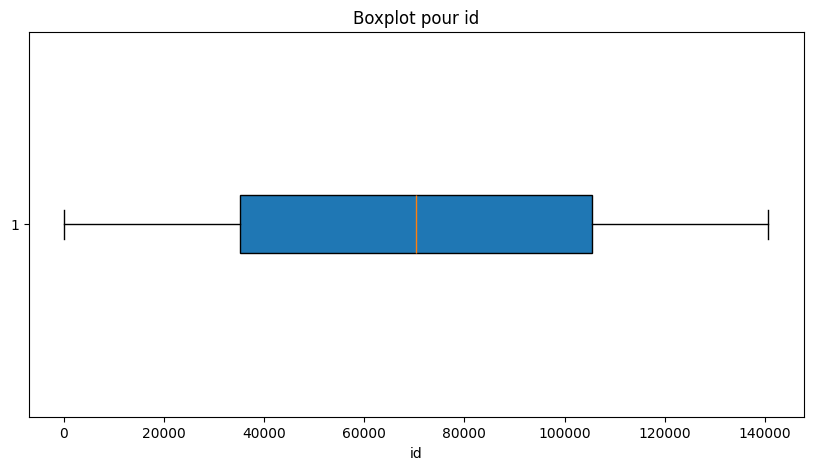

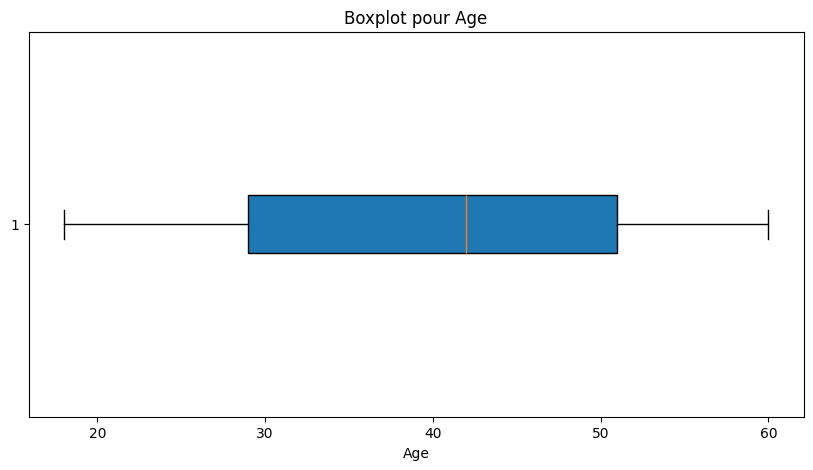

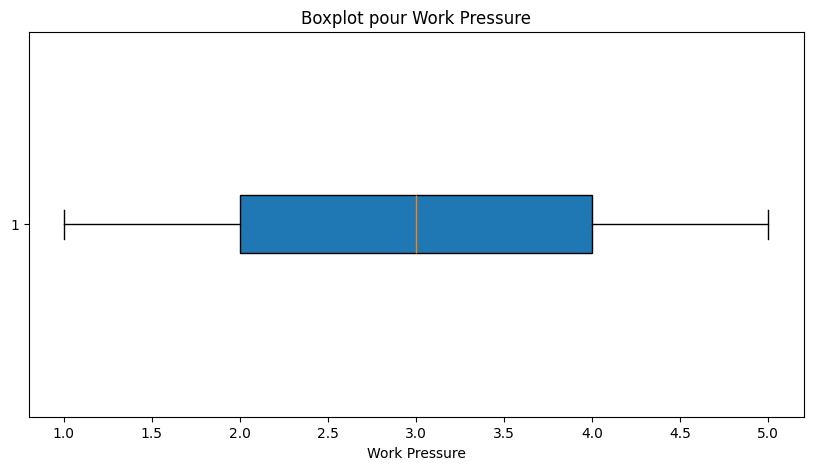

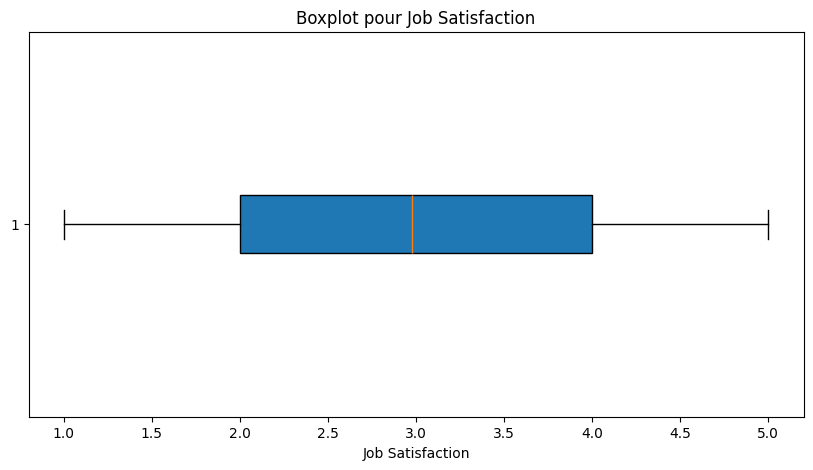

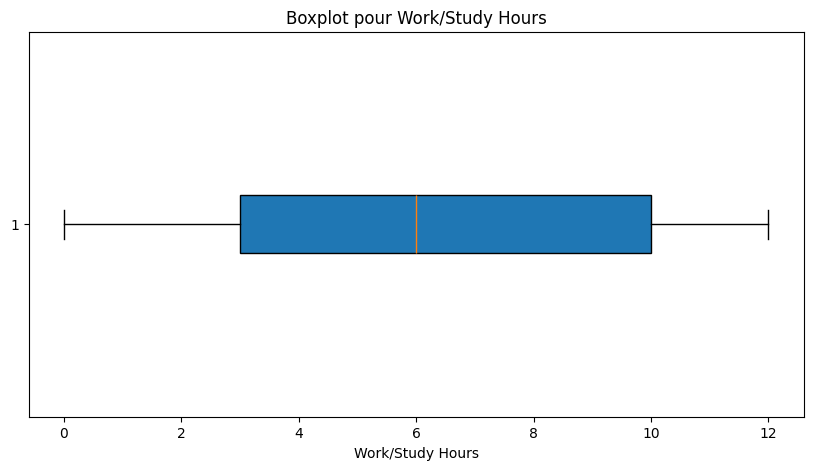

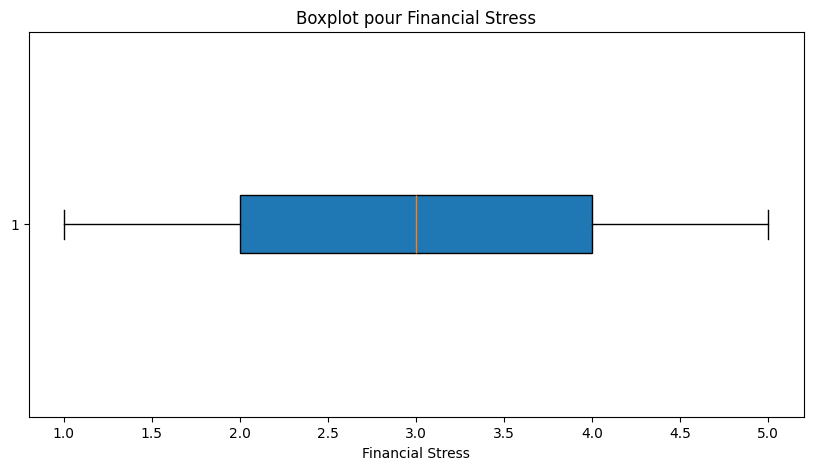

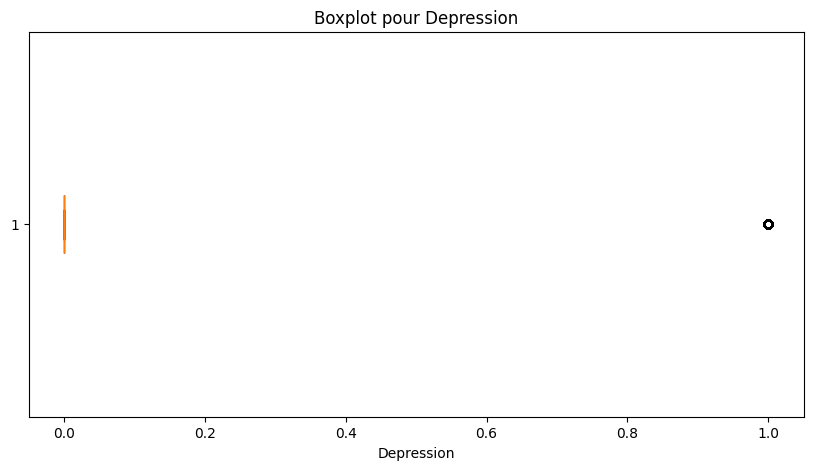

In [ ]:
import matplotlib.pyplot as plt

# Détection de valeurs aberrantes pour les colonnes numériques
# Utilisation de boxplots pour visualiser les valeurs aberrantes
numerical_columns = data.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot pour {column}")
    plt.xlabel(column)
    plt.show()


De manière générale, on observe pas de valeurs aberrantes significatives

**21 Questions** : Quoi faire avant,  l'encodage des variables catégories pour prépare les données au modèle ou bien la construction des visualisations exploratoires entre les variables indépendantes et la cible Depression ?

On a 80% des données manquantes pour ces colonnes. peut -on penser à les remplir avec une méthode de OverSampling ?


**Visualisations exploratoires entre les variables indépendantes et la cible Depression**

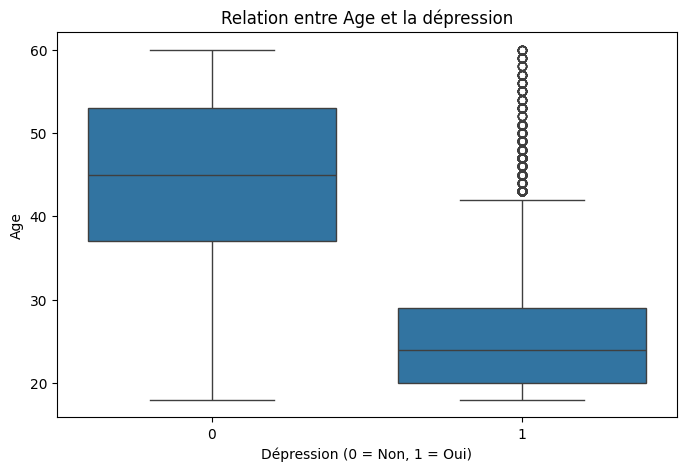

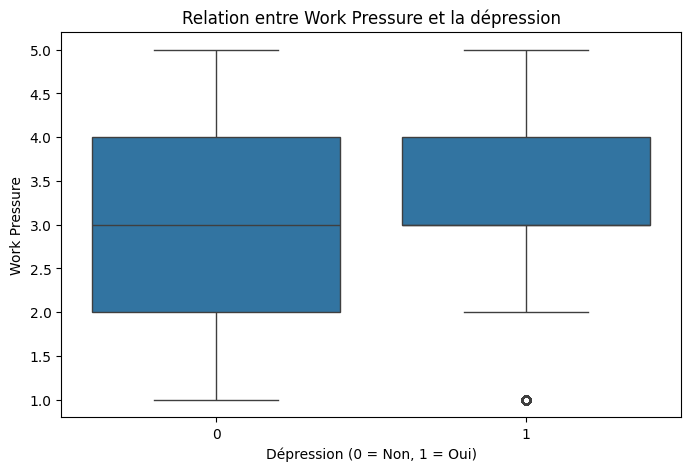

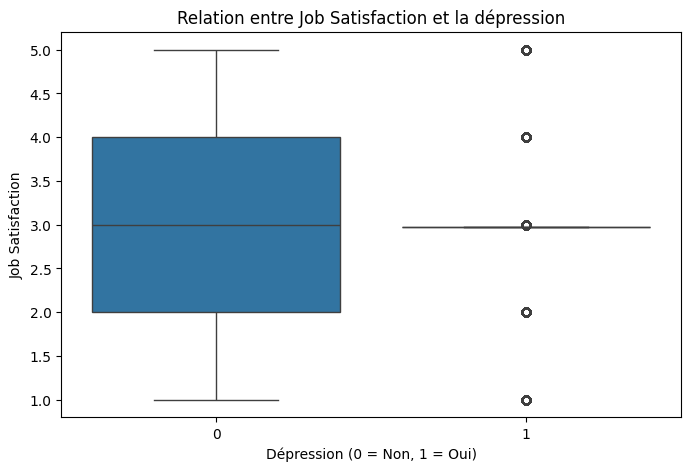

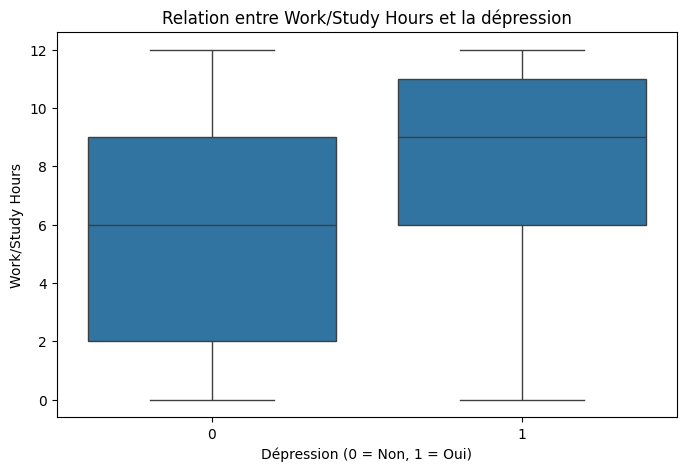

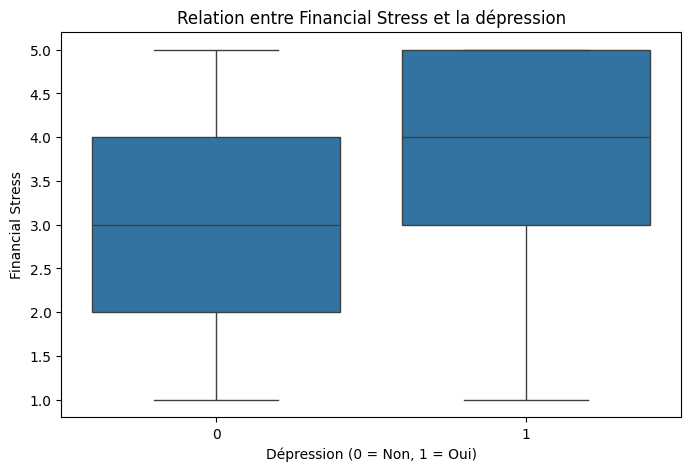

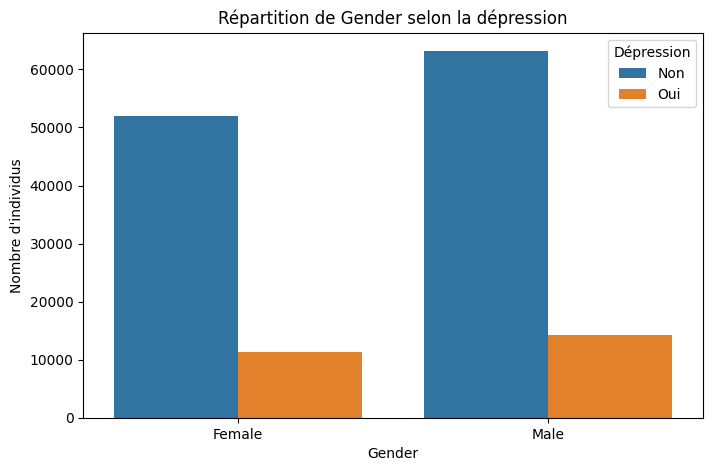

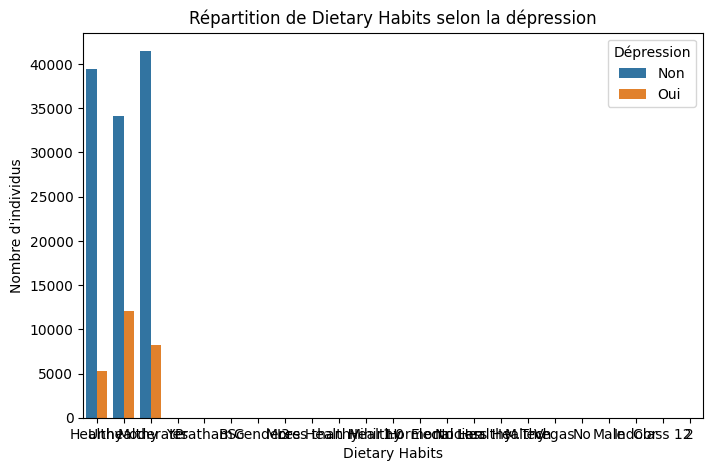

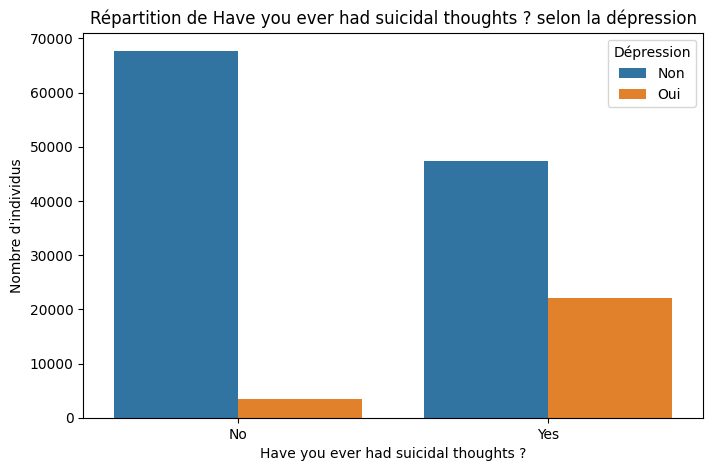

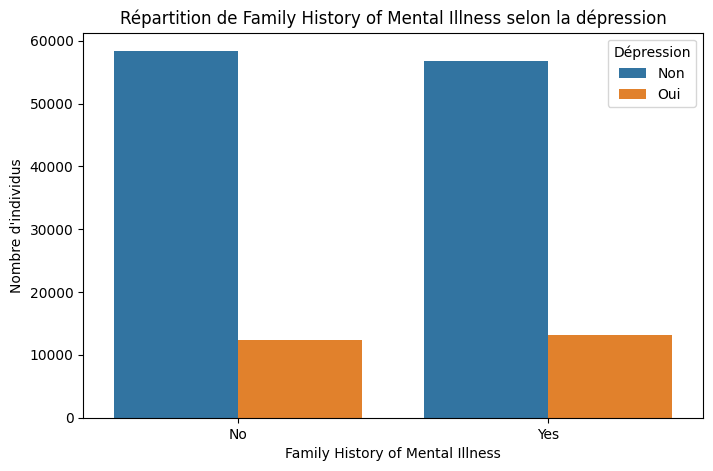

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes numériques pour l'exploration
numerical_columns = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Visualisation des relations entre les variables numériques et la cible "Depression"
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Depression', y=column, data=data)
    plt.title(f"Relation entre {column} et la dépression")
    plt.xlabel("Dépression (0 = Non, 1 = Oui)")
    plt.ylabel(column)
    plt.show()

# Visualisation des relations entre variables catégoriques et la cible "Depression"
categorical_columns_to_plot = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
                                'Family History of Mental Illness']

for column in categorical_columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Depression', data=data)
    plt.title(f"Répartition de {column} selon la dépression")
    plt.xlabel(column)
    plt.ylabel("Nombre d'individus")
    plt.legend(title="Dépression", labels=["Non", "Oui"])
    plt.show()


**One-Hot Encoding**

In [ ]:
# Encodage des variables catégoriques avec One-Hot Encoding pour les colonnes pertinentes
categorical_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession',
                       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness', 'Sleep Duration']

# Application de l'encodage
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data = data_encoded
data.head()

,id,Age,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,City_Aaradhya,City_Aditya,...,Sleep Duration_10-6 hours,Sleep Duration_than 5 hours,Sleep Duration_49 hours,Sleep Duration_Unhealthy,Sleep Duration_Work_Study_Hours,Sleep Duration_3-6 hours,Sleep Duration_45-48 hours,Sleep Duration_2024-05-09 00:00:00,Sleep Duration_Pune,Sleep Duration_9-5 hours
0,0,49.0,5.000000,2.000000,1.0,2.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,26.0,4.000000,3.000000,7.0,3.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,33.0,2.998998,2.974404,3.0,1.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,22.0,5.000000,1.000000,10.0,1.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,30.0,1.000000,1.000000,9.0,4.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**1- Séparer les données en caractéristiques (features) et cible (target)**

In [ ]:
X = data.drop('Depression', axis=1)  # Features
y = data['Depression']              # Target

**2-Diviser les données en ensembles d'entraînement et de test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3-Normaliser ou standardiser les données numériques**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**4- Choix d'un modèle**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

**5- Evaluation du modèle**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Prédictions
y_pred = model.predict(X_test_scaled)

# Évaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96     22986
           1       0.81      0.78      0.80      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.87      0.88     28140
weighted avg       0.93      0.93      0.93     28140

ROC-AUC: 0.9701924060944995


On obtient un score de 0,97 qui correspond à un très bon score pour le modèle considéré.  Il y a un fort déséquilibre dans le support (22986 pour 0 vs 5154 pour 1). Cela pourrait expliquer pourquoi le modèle est légèrement biaisé vers la classe majoritaire.